# Direct Oral Anticoagulant (DOAC) prescribing during COVID-19

In [19]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

In [20]:
# function that plot individual line for each unique demographic
def plot_measure_line(measure_df, demographic_group):
    """
    measure_df: measure file
    demographic: string that indicates what demographic you want to plot
    """
    
    for d in measure_df[demographic_group].unique():
       
        
        df_subset = measure_df[measure_df[demographic_group] == d]
        plt.plot(df_subset['date'], df_subset['on_doac'], label=d)
        
    plt.ylabel('Count of people prescribed a DOAC')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.tight_layout()
    axes = plt.gca()
    axes.grid(color="0.9", linestyle='dashed')
    axes.xaxis_date
    plt.savefig(f'../output/plot_{demographic_group}.png')
    plt.show()    
    

## Plots by demographics

### 1. Number of people prescribed a DOAC broken down into age bands

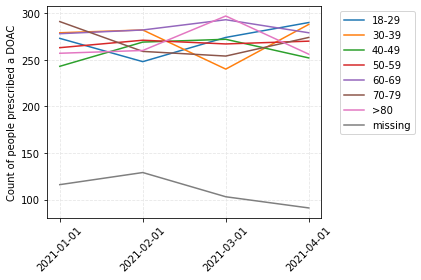

In [21]:
measure_df = pd.read_csv(f'../output/measure_doacs_by_age_band.csv')

plot_measure_line(measure_df, 'age_band')

### 2. Number of people prescribed a DOAC identified as being a 'caregiver'

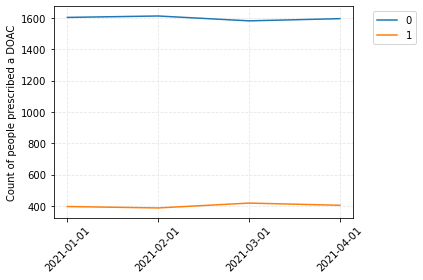

In [22]:
measure_df = pd.read_csv(f'../output/measure_doacs_by_carer.csv')

plot_measure_line(measure_df, 'carer')

### 3. Number of people prescribed a DOAC by region

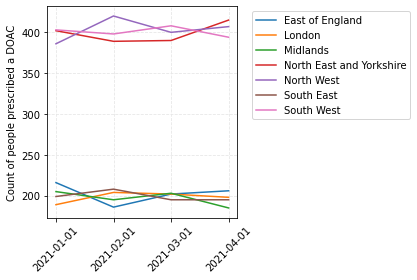

In [23]:
measure_df = pd.read_csv(f'../output/measure_doacs_by_region.csv')

plot_measure_line(measure_df, 'region')

### 4. Number of people prescribed a DOAC by sex

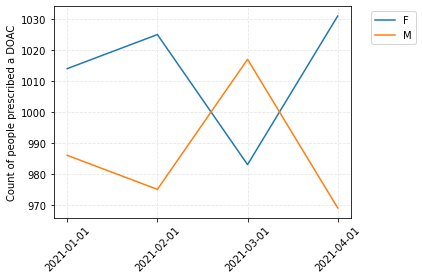

In [24]:
measure_df = pd.read_csv(f'../output/measure_doacs_by_sex.csv')

plot_measure_line(measure_df, 'sex')